<a href="https://colab.research.google.com/github/nlgandhi/LearnPython/blob/master/IB_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install -q pandas lightgbm
!pip install scikit-learn

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# New Section

In [114]:
# Importing the dataset. 
dataset = pd.read_csv('IB_Train_Data.csv')
# This is the most important step. In this case we are reading the features
# that we want to train the model with. In this case its just Age and Estimated Salary.
X = dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values
print(X[0])
# This is the Label. In ths case the LABEL is Purchased
y = dataset.iloc[:, 10].values
# print(y[0])
print('Features Loaded into X and Labels loaded into Y')
# print(X)
# print(y)

[1.000e+00 9.600e+01 0.000e+00 2.011e+03 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 1.000e+00 2.400e+01]
Features Loaded into X and Labels loaded into Y


In [105]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Data Has Been Split')

Data Has Been Split


In [115]:
# Feature Scaling
# StandardScaler rescales each column to have 0 mean and 1 Standard Deviation.
print(x_test[1])  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_test[1])  

[-1.14353617 -0.89879609 -0.73515387 -0.14251079 -0.06646664 -0.02622442
 -0.08517396 -0.40697647 -0.31974127 -0.54621366]
[-1.14353617 -0.89879609 -0.73515387 -0.14251079 -0.06646664 -0.02622442
 -0.08517396 -0.40697647 -0.31974127 -0.54621366]


In [116]:
# Start Here...
import lightgbm as lgb

# Load the Training Data Age and Salary and Label => Purchased
# First Parameter is the Training Data and the second Parameters is the label
evals_result = {}  # to record eval results for plotting

d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'dart' # dart
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, 
                d_train, 
                num_boost_round=100,
                evals_result=evals_result,
                verbose_eval=10)

# Decouple Model develpment from Model Inference 
print('Saving model...')
clf.save_model('IB_ML_V1.txt')


Saving model...


In [117]:
#Prediction
bst = lgb.Booster(model_file='IB_ML_V1.txt')  # init model
y_pred=bst.predict(x_test)
# print(x_test)
# print(y_pred)
# print(len(y_pred))

# for i in y_pred:
for i in range(len(y_pred)):  
    if y_pred[i]>=.5:       # setting threshold to .5
        y_pred[i]=1
    else:  
        y_pred[i]=0

# print(y_pred)
#print(y_test)    

In [120]:
# Single Row Prediction (Important)
# Make a single prediction -  Example Row-2=1 

model = lgb.Booster(model_file='IB_ML_V1.txt')  # init model
row2 = [[1,252,0,1977,0,0,0,1,0,2]]

# Really not sure about this part. May need some help here.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
row2 = sc.transform(row2)
print(row2)

yhat = model.predict(row2)
print('Prediction: %d' % yhat[0])



[[ 1.00000000e+00  2.52000000e+02  4.97251520e-16  1.97700000e+03
   3.11370705e-15  1.42288552e-15 -2.86756748e-16  1.00000000e+00
   6.58989560e-15  2.00000000e+00]]
Prediction: 0


In [110]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.7635890481252062


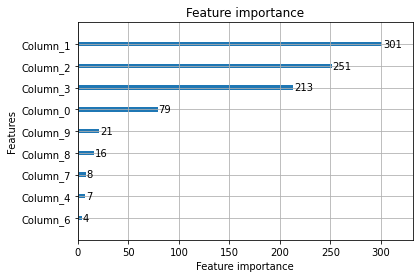

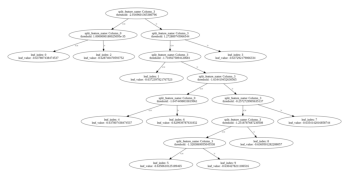

In [111]:
import matplotlib.pyplot as plt
import os

ax = lgb.plot_importance(bst, max_num_features=10)
plt.show()
 
ax = lgb.plot_tree(bst)
plt.show()



